In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# Load and preprocess the data

In [ ]:
data_dir = '/content/drive/MyDrive/SEM 2 Project/rice_leaf_diseases'
batch_size = 32
img_height, img_width = 256, 256

In [ ]:
datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2
)

In [ ]:
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

Found 96 images belonging to 3 classes.


In [ ]:
validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 24 images belonging to 3 classes.


# Build the model

In [ ]:

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
steps_per_epoch = train_generator.samples // batch_size
validation_steps = validation_generator.samples // batch_size

In [ ]:
steps_per_epoch = max(steps_per_epoch, 1)
validation_steps = max(validation_steps, 1)

In [ ]:
steps_per_epoch

3

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    epochs=20,
    callbacks=[early_stopping]
)

Epoch 1/20
3/3 [==============================] - 21s 6s/step - loss: 0.3047 - accuracy: 0.9062 - val_loss: 0.6050 - val_accuracy: 0.8333
Epoch 2/20
3/3 [==============================] - 20s 6s/step - loss: 0.2508 - accuracy: 0.8542 - val_loss: 0.7719 - val_accuracy: 0.7500
Epoch 3/20
3/3 [==============================] - 19s 6s/step - loss: 0.2351 - accuracy: 0.9167 - val_loss: 0.8971 - val_accuracy: 0.7083
Epoch 4/20
3/3 [==============================] - 19s 6s/step - loss: 0.2666 - accuracy: 0.8854 - val_loss: 0.5377 - val_accuracy: 0.7500
Epoch 5/20
3/3 [==============================] - 20s 6s/step - loss: 0.2576 - accuracy: 0.8854 - val_loss: 0.7608 - val_accuracy: 0.6250
Epoch 6/20
3/3 [==============================] - 20s 7s/step - loss: 0.1729 - accuracy: 0.9583 - val_loss: 1.0763 - val_accuracy: 0.7083
Epoch 7/20
3/3 [==============================] - 27s 10s/step - loss: 0.1498 - accuracy: 0.9583 - val_loss: 0.4762 - val_accuracy: 0.7500
Epoch 8/20
3/3 [=================

# Evaluate the model

In [ ]:

val_loss, val_accuracy = model.evaluate(validation_generator)
print(f'Validation Accuracy: {val_accuracy*100:.2f}%')

1/1 [==============================] - 2s 2s/step - loss: 0.4535 - accuracy: 0.8333
Validation Accuracy: 83.33%


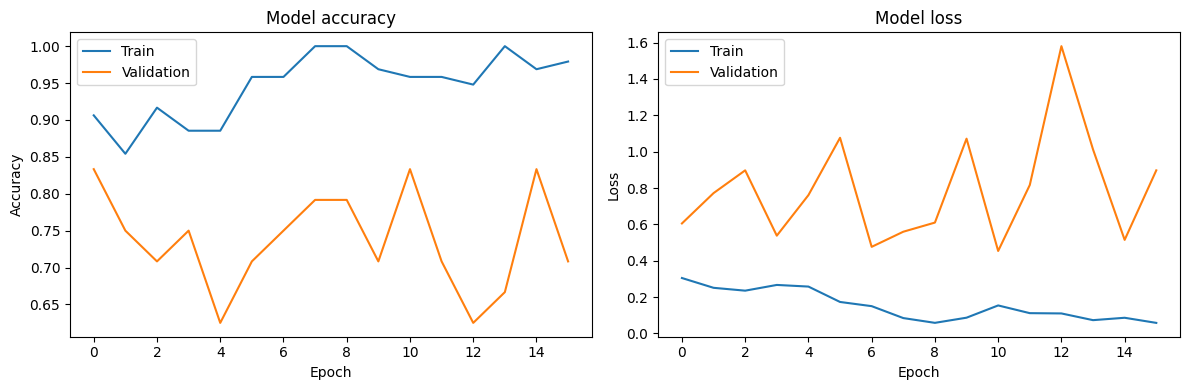

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/SEM 2 Project/Model/rice_leaf_disease_model_v3.h5')

# Testing the model

In [ ]:
from tensorflow.keras.models import load_model
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def predict_image(image_path, model):
    img_height, img_width = 256, 256
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(img_height, img_width))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    predictions = model.predict(img_array)
    class_idx = np.argmax(predictions)
    class_labels = list(train_generator.class_indices.keys())
    predicted_class = class_labels[class_idx]


    plt.figure(figsize=(6, 4))
    plt.imshow(img)
    plt.title(f'Predicted Class: {predicted_class}')
    plt.axis('off')
    plt.show()

    return predicted_class

In [ ]:
model = load_model('/content/drive/MyDrive/SEM 2 Project/Model/rice_leaf_disease_model_v3.h5')

1/1 [==============================] - 0s 302ms/step


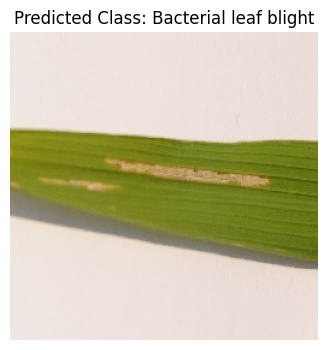

Bacterial leaf blight


In [ ]:
image_path='/content/image9.JPG'
prediction = predict_image(image_path, model)
print(prediction)